In [1]:
from NMR_ML import Dataset, FourierTransform
import matplotlib.pyplot as plt

In [2]:
gaus = Dataset(data_directory_path="../../work/data/2021-08-14_gauss/")
rawdata = gaus.load_data()
rscl_df, _ = gaus.get_window(rawdata, center_ratio=2/3, width=150)

Finished loading rawdata into numpy array
The Echo pulse occurs at timestep: 1256


# Fourier Transform of the timeseries

- Here, we use the `FourierTransform` class and transform the time-domain signals to frequency domain. The transform is performed on the desired rescaled_data {`rscl_df`). 
- We first smoothen out all the noise near the edges of the time-window by convolving the time-window with a suitable sigmoid function that vanishes at the boundries of the window, then we perform zero-padding (add $2^{\text{zero_padding}}$ zeros on both sides of the smoothened time-window) before finally applying the fast-fourier-transform to get the fourier transform. 

In [3]:
# Fourier transform data
ft_data, freq_ax_dataframe = FourierTransform(zero_padding=8).transform(rscl_df.to_numpy())

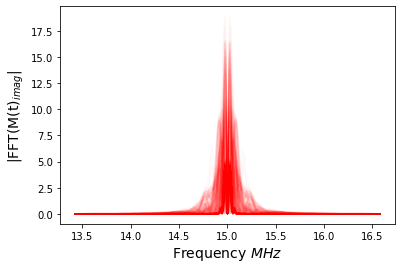

In [4]:
fig, ax = plt.subplots()
ax.plot(15+freq_ax_dataframe[0], ft_data[::10].T, color='red', alpha=0.02)
ax.set_xlabel("Frequency $MHz$", fontsize=14)
ax.set_ylabel("|FFT(M(t)$_{imag}$|", fontsize=14)
plt.show()

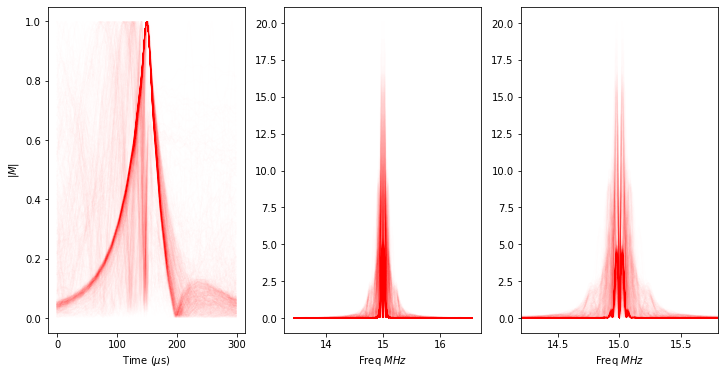

In [5]:
fig, ax = plt.subplots(1,3, figsize=(12,6))

ax[0].plot(rscl_df.to_numpy()[::5].T, alpha=0.002, color='red')
ax[0].set(xlabel='Time ($\mu$s)', ylabel='$|M|$')

ax[1].plot(15+ freq_ax_dataframe[0], ft_data[::5].T, alpha=0.002, color='red')
ax[1].set(xlabel='Freq $MHz$')

ax[2].plot(15+ freq_ax_dataframe[0], ft_data[::5].T, alpha=0.002, color='red')
ax[2].set_xlim(15-0.8, 15+0.8)
ax[2].set(xlabel='Freq $MHz$')

plt.show()

## We now look at the Fourier transform of the three different functional types

In [6]:
gaus = Dataset(data_directory_path="../../work/data/2021-08-14_gauss/")
power = Dataset(data_directory_path="../../work/data/2021-08-14_power/")
rkky =  Dataset(data_directory_path="../../work/data/2021-08-14_RKKY/")

rawdata_gaus = gaus.load_data()
rawdata_power = power.load_data()
rawdata_RKKY = rkky.load_data()


rscl_df_gaus, _ = gaus.get_window(rawdata_gaus, center_ratio=2/3, width=150)
rscl_df_power, _ = power.get_window(rawdata_power, center_ratio=2/3, width=150)
rscl_df_rkky, _ = rkky.get_window(rawdata_RKKY, center_ratio=2/3, width=150)

Finished loading rawdata into numpy array
Finished loading rawdata into numpy array
Finished loading rawdata into numpy array
The Echo pulse occurs at timestep: 1256
The Echo pulse occurs at timestep: 1256
The Echo pulse occurs at timestep: 1256


In [7]:
# Fourier transform data

ft_data_gaus, freq_ax_df_gaus = FourierTransform(zero_padding=8).transform(rscl_df_gaus.to_numpy())
ft_data_power, freq_ax_df_power = FourierTransform(zero_padding=8).transform(rscl_df_power.to_numpy())
ft_data_rkky, freq_ax_df_rkky = FourierTransform(zero_padding=8).transform(rscl_df_rkky.to_numpy())

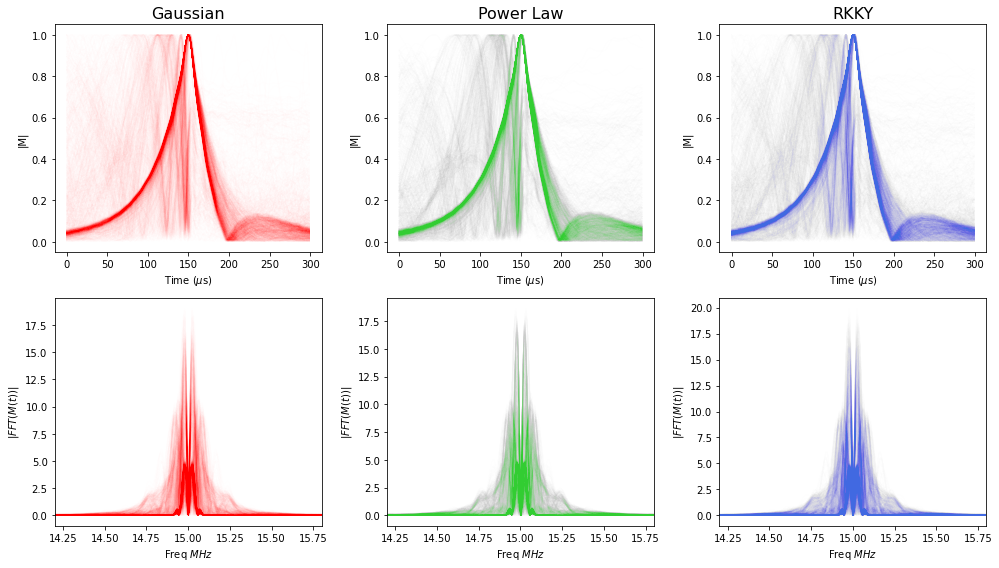

In [8]:
fig, axes = plt.subplots(2,3, figsize=(14,8))
color=['red', 'limegreen', 'royalblue']
freq_ax = [freq_ax_df_gaus, freq_ax_df_power, freq_ax_df_rkky]
titles = ['Gaussian', 'Power Law', 'RKKY']

counter=0
for ax, ts in zip(axes[0], [rscl_df_gaus, rscl_df_power, rscl_df_rkky]):
    ax.plot(ts.to_numpy()[::3].T, color=color[counter], alpha=0.002)
    ax.set(xlabel='Time ($\mu$s)', ylabel='|M|')
    counter+=1


counter=0
for ax, fs in zip(axes[1], [ft_data_gaus, ft_data_power, ft_data_rkky ]):
    ax.plot(15+freq_ax[counter][0], fs[::3].T, color=color[counter], alpha=0.002)
    ax.set_xlim(15-0.8, 15+0.8)
    ax.set(xlabel='Freq $MHz$', ylabel='$|FFT(M(t))|$')
    counter+=1
    
for idx,ax in enumerate(axes[0]):
    ax.set_title(titles[idx], fontsize=16)
    

plt.tight_layout()
plt.show()